In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Examples on converting to other formats

In [2]:
from distgen.drivers import run_distgen

import os

In [3]:
beam = run_distgen(inputs='data/rad.gaussian.in.yaml', verbose=1)

Distribution format: gpt
Output file: rad.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 10 pC.
   Number of macroparticles: 200000.
   Assuming cylindrical symmetry...
   r distribution: radial Gaussian
   theta distribution: uniform theta
      min_theta = 0 rad, max_theta = 6.28319 rad
   t distribution: uniform
      min_t = -2 ps, max_t = 2 ps, avg_t = 0 ps, sigma_t:  1.1547 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Shifting avg_x = -7.82345E-05 mm -> 0 mm
   Scaling sigma_x = 1.99984 mm -> 2 mm
   Shifting avg_y = -1.09911E-05 mm -> 0 mm
   Scaling sigma_y = 1.99994 mm -> 2 mm


   Shifting avg_px = -0.0212516 eV/c -> 0 eV/c
   Scaling sigma_px = 276.849 eV/c -> 276.857 eV/c
   Shifting avg_py = -0.0259627 eV/c -> 0 eV/c
   Scaling sigma_py = 276.844 eV/c -> 276.857 eV/c
   Shifting avg_pz = -0.0372953 eV/c -> 0 eV/c
   Scaling sigma_pz = 276.843 eV/c -> 276.857 eV/c
   Shifting avg_t = -4.90022E-05 ps -> 0 ps
   Scaling sigma_t = 1.1547 ps -> 1.1547 ps
   Cathode start: fixing pz momenta to forward hemisphere
      avg_pz -> 220.904 eV/c, sigma_pz -> 166.887 eV/c
...done. Time Elapsed: 226.251 ms.

Printing 200000 particles to "rad.gaussian.out.txt": 

done. Time ellapsed: 1.22324 s.

Beam stats:
   avg_x = 0 mm, sigma_x = 2 mm
   avg_y = 2.06253E-16 mm, sigma_y = 2 mm
   avg_z = 0 mm, sigma_z = 0 mm
   avg_px = -6.66134E-16 eV/c, sigma_px = 276.857 eV/c
   avg_py = -6.55986E-15 eV/c, sigma_py = 276.857 eV/c
   avg_pz = 220.904 eV/c, sigma_pz = 166.887 eV/c
   avg_t = -2.04087E-17 ps, sigma_t = 1.1547 ps


In [4]:
# convert to simple data
beam.data()

{'n_particle': 200000,
 'species': 'electron',
 'weight': array([5.e-17, 5.e-17, 5.e-17, ..., 5.e-17, 5.e-17, 5.e-17]),
 'status': array([1, 1, 1, ..., 1, 1, 1]),
 'x': array([0.00128902, 0.00305076, 0.00214569, ..., 0.00260949, 0.00176679,
        0.00372237]),
 'y': array([ 5.14825056e-08,  2.02660913e-07,  2.13199098e-07, ...,
        -2.34926147e-07, -1.00008370e-07, -1.05941416e-07]),
 'z': array([0., 0., 0., ..., 0., 0., 0.]),
 'px': array([ -13.86451651,  129.51065025,  325.33389514, ...,  275.67822102,
        -388.46055125, -161.11136234]),
 'py': array([ 173.64325013,  321.97896692, -482.08502038, ...,  250.89066801,
         486.05742377, -320.26104161]),
 'pz': array([356.09464955, 242.9422157 , 160.51948115, ..., 162.23391877,
        245.05703821, 359.35728695]),
 't': array([-1.40736274e-12, -7.40252999e-14,  1.25931214e-12, ...,
         9.71015844e-13, -1.25121322e-12,  8.21242174e-14])}

# openPMD beamphysics data

In [5]:
from pmd_beamphysics import ParticleGroup

In [6]:
P = ParticleGroup(data = beam.data())

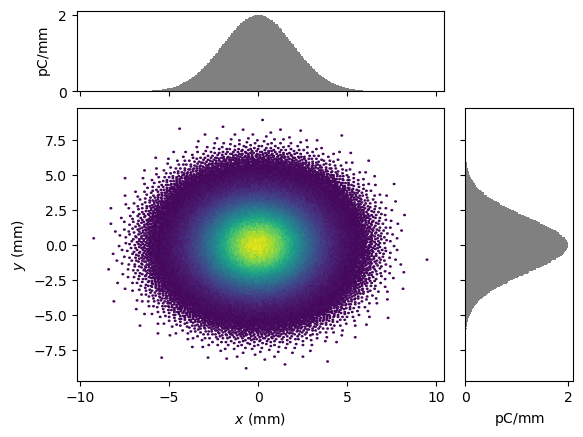

In [7]:
P.plot('x', 'y')

In [8]:
# Resample to fewer particles
P2 = P.resample(10000)

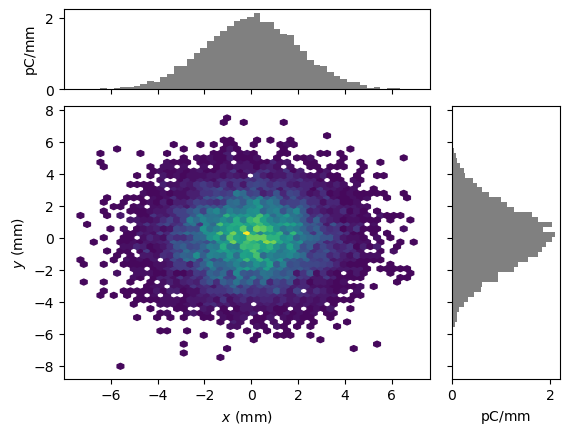

In [9]:
P2.plot('x', 'y')

In [10]:
# Use the ParticleGroup to write to h5
P2.write('distgen_particles.h5')

In [11]:
P2.gamma

array([1.00000025, 1.00000044, 1.00000019, ..., 1.00000018, 1.00000015,
       1.00000043])

In [12]:
from h5py import File
with File('distgen_particles.h5', 'r') as h5:
    P3 = ParticleGroup(h5)

In [13]:
P3.gamma

array([1.00000025, 1.00000044, 1.00000019, ..., 1.00000018, 1.00000015,
       1.00000043])

In [14]:
# Cleanup
os.remove('distgen_particles.h5')
os.remove('rad.gaussian.out.txt')